In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from scipy.stats import chi2_contingency
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE

In [173]:
df = pd.read_csv("C:/Users/Chandrika/customer.csv")

In [174]:
df

,Unnamed: 0,Customer,State,CustomerLifetimeValue,Response,Coverage,Education,EffectiveToDate,EmploymentStatus,Gender,...,MonthsSincePolicyInception,NumberofOpenComplaints,NumberofPolicies,PolicyType,Policy,RenewOfferType,SalesChannel,ClaimAmount,VehicleClass,VehicleSize
0,0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [175]:
df.head()

,Unnamed: 0,Customer,State,CustomerLifetimeValue,Response,Coverage,Education,EffectiveToDate,EmploymentStatus,Gender,...,MonthsSincePolicyInception,NumberofOpenComplaints,NumberofPolicies,PolicyType,Policy,RenewOfferType,SalesChannel,ClaimAmount,VehicleClass,VehicleSize
0,0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [176]:
df.columns

Index(['Unnamed: 0', 'Customer', 'State', 'CustomerLifetimeValue', 'Response',
       'Coverage', 'Education', 'EffectiveToDate', 'EmploymentStatus',
       'Gender', 'Income', 'LocationCode', 'MaritalStatus',
       'MonthlyPremiumAuto', 'MonthsSinceLastClaim',
       'MonthsSincePolicyInception', 'NumberofOpenComplaints',
       'NumberofPolicies', 'PolicyType', 'Policy', 'RenewOfferType',
       'SalesChannel', 'ClaimAmount', 'VehicleClass', 'VehicleSize'],
      dtype='object')

## 1) Feature Transformation
### 1.1 Feature Encoding 
### 1.1.1 Label Encoding

In [177]:
data = df['State']
data_1 = pd.DataFrame(data)
data_1

,State
0,Washington
1,Arizona
2,Nevada
3,California
4,Washington
...,...
9129,California
9130,California
9131,California
9132,California


In [178]:
encoder = LabelEncoder()  

encoder.fit(data_1['State'])

df['State'] = encoder.transform(data_1['State'])   

df

,Unnamed: 0,Customer,State,CustomerLifetimeValue,Response,Coverage,Education,EffectiveToDate,EmploymentStatus,Gender,...,MonthsSincePolicyInception,NumberofOpenComplaints,NumberofPolicies,PolicyType,Policy,RenewOfferType,SalesChannel,ClaimAmount,VehicleClass,VehicleSize
0,0,BU79786,4,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,1,QZ44356,0,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,2,AI49188,2,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,3,WW63253,1,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,4,HB64268,4,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,9129,LA72316,1,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,9130,PK87824,1,3096.511217,Yes,Extended,College,2/12/11,Employed,F,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,9131,TD14365,1,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,9132,UP19263,1,7524.442436,No,Extended,College,2/3/11,Employed,M,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [179]:
data = df['CustomerLifetimeValue']
data_1 = pd.DataFrame(data)
data_1

,CustomerLifetimeValue
0,2763.519279
1,6979.535903
2,12887.431650
3,7645.861827
4,2813.692575
...,...
9129,23405.987980
9130,3096.511217
9131,8163.890428
9132,7524.442436


In [180]:
encoder = LabelEncoder()  

encoder.fit(data_1['CustomerLifetimeValue'])

df['CustomerLifetimeValue'] = encoder.transform(data_1['CustomerLifetimeValue'])   

df

,Unnamed: 0,Customer,State,CustomerLifetimeValue,Response,Coverage,Education,EffectiveToDate,EmploymentStatus,Gender,...,MonthsSincePolicyInception,NumberofOpenComplaints,NumberofPolicies,PolicyType,Policy,RenewOfferType,SalesChannel,ClaimAmount,VehicleClass,VehicleSize
0,0,BU79786,4,975,No,Basic,Bachelor,2/24/11,Employed,F,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,1,QZ44356,0,4659,No,Extended,Bachelor,1/31/11,Unemployed,F,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,2,AI49188,2,6900,No,Premium,Bachelor,2/19/11,Employed,F,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,3,WW63253,1,5140,No,Basic,Bachelor,1/20/11,Unemployed,M,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,4,HB64268,4,1058,No,Basic,Bachelor,2/3/11,Employed,M,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,9129,LA72316,1,7701,No,Basic,Bachelor,2/10/11,Employed,M,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,9130,PK87824,1,1390,Yes,Extended,College,2/12/11,Employed,F,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,9131,TD14365,1,5516,No,Extended,Bachelor,2/6/11,Unemployed,M,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,9132,UP19263,1,5041,No,Extended,College,2/3/11,Employed,M,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [181]:
data = df['Customer']
data_1 = pd.DataFrame(data)
data_1

,Customer
0,BU79786
1,QZ44356
2,AI49188
3,WW63253
4,HB64268
...,...
9129,LA72316
9130,PK87824
9131,TD14365
9132,UP19263


In [182]:
encoder = LabelEncoder()  

encoder.fit(data_1['Customer'])

df['Customer'] = encoder.transform(data_1['Customer'])   

df

,Unnamed: 0,Customer,State,CustomerLifetimeValue,Response,Coverage,Education,EffectiveToDate,EmploymentStatus,Gender,...,MonthsSincePolicyInception,NumberofOpenComplaints,NumberofPolicies,PolicyType,Policy,RenewOfferType,SalesChannel,ClaimAmount,VehicleClass,VehicleSize
0,0,600,4,975,No,Basic,Bachelor,2/24/11,Employed,F,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,1,5946,0,4659,No,Extended,Bachelor,1/31/11,Unemployed,F,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,2,96,2,6900,No,Premium,Bachelor,2/19/11,Employed,F,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,3,8016,1,5140,No,Basic,Bachelor,1/20/11,Unemployed,M,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,4,2488,4,1058,No,Basic,Bachelor,2/3/11,Employed,M,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,9129,3857,1,7701,No,Basic,Bachelor,2/10/11,Employed,M,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,9130,5390,1,1390,Yes,Extended,College,2/12/11,Employed,F,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,9131,6688,1,5516,No,Extended,Bachelor,2/6/11,Unemployed,M,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,9132,7214,1,5041,No,Extended,College,2/3/11,Employed,M,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


## 1.1.2 Ordinal Encoding

In [183]:
df.Education.unique()

array(['Bachelor', 'College', 'Master', 'High School or Below', 'Doctor'],
      dtype=object)

In [184]:
ed_cat = ['High School or Below', 'College', 'Bachelor', 'Master', 'Doctor']
encoder = OrdinalEncoder(categories = [ed_cat])

df['Education'] = encoder.fit_transform(df[['Education']])

df

,Unnamed: 0,Customer,State,CustomerLifetimeValue,Response,Coverage,Education,EffectiveToDate,EmploymentStatus,Gender,...,MonthsSincePolicyInception,NumberofOpenComplaints,NumberofPolicies,PolicyType,Policy,RenewOfferType,SalesChannel,ClaimAmount,VehicleClass,VehicleSize
0,0,600,4,975,No,Basic,2.0,2/24/11,Employed,F,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,1,5946,0,4659,No,Extended,2.0,1/31/11,Unemployed,F,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,2,96,2,6900,No,Premium,2.0,2/19/11,Employed,F,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,3,8016,1,5140,No,Basic,2.0,1/20/11,Unemployed,M,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,4,2488,4,1058,No,Basic,2.0,2/3/11,Employed,M,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,9129,3857,1,7701,No,Basic,2.0,2/10/11,Employed,M,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,9130,5390,1,1390,Yes,Extended,1.0,2/12/11,Employed,F,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,9131,6688,1,5516,No,Extended,2.0,2/6/11,Unemployed,M,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,9132,7214,1,5041,No,Extended,1.0,2/3/11,Employed,M,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [185]:
df['RenewOfferType'].unique()

array(['Offer1', 'Offer3', 'Offer2', 'Offer4'], dtype=object)

In [186]:
renew_cat = ['Offer1', 'Offer3', 'Offer2', 'Offer4']
encoder = OrdinalEncoder(categories = [renew_cat])

df['RenewOfferType'] = encoder.fit_transform(df[['RenewOfferType']])

df

,Unnamed: 0,Customer,State,CustomerLifetimeValue,Response,Coverage,Education,EffectiveToDate,EmploymentStatus,Gender,...,MonthsSincePolicyInception,NumberofOpenComplaints,NumberofPolicies,PolicyType,Policy,RenewOfferType,SalesChannel,ClaimAmount,VehicleClass,VehicleSize
0,0,600,4,975,No,Basic,2.0,2/24/11,Employed,F,...,5,0,1,Corporate Auto,Corporate L3,0.0,Agent,384.811147,Two-Door Car,Medsize
1,1,5946,0,4659,No,Extended,2.0,1/31/11,Unemployed,F,...,42,0,8,Personal Auto,Personal L3,1.0,Agent,1131.464935,Four-Door Car,Medsize
2,2,96,2,6900,No,Premium,2.0,2/19/11,Employed,F,...,38,0,2,Personal Auto,Personal L3,0.0,Agent,566.472247,Two-Door Car,Medsize
3,3,8016,1,5140,No,Basic,2.0,1/20/11,Unemployed,M,...,65,0,7,Corporate Auto,Corporate L2,0.0,Call Center,529.881344,SUV,Medsize
4,4,2488,4,1058,No,Basic,2.0,2/3/11,Employed,M,...,44,0,1,Personal Auto,Personal L1,0.0,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,9129,3857,1,7701,No,Basic,2.0,2/10/11,Employed,M,...,89,0,2,Personal Auto,Personal L1,2.0,Web,198.234764,Four-Door Car,Medsize
9130,9130,5390,1,1390,Yes,Extended,1.0,2/12/11,Employed,F,...,28,0,1,Corporate Auto,Corporate L3,0.0,Branch,379.200000,Four-Door Car,Medsize
9131,9131,6688,1,5516,No,Extended,2.0,2/6/11,Unemployed,M,...,37,3,2,Corporate Auto,Corporate L2,0.0,Branch,790.784983,Four-Door Car,Medsize
9132,9132,7214,1,5041,No,Extended,1.0,2/3/11,Employed,M,...,3,0,3,Personal Auto,Personal L2,1.0,Branch,691.200000,Four-Door Car,Large


In [187]:
df['EmploymentStatus'].unique()

array(['Employed', 'Unemployed', 'Medical Leave', 'Disabled', 'Retired'],
      dtype=object)

In [188]:
emp_cat = ['Employed', 'Unemployed', 'Medical Leave',
       'Disabled', 'Retired']
encoder = OrdinalEncoder(categories = [emp_cat])

df['EmploymentStatus'] = encoder.fit_transform(df[['EmploymentStatus']])

df

,Unnamed: 0,Customer,State,CustomerLifetimeValue,Response,Coverage,Education,EffectiveToDate,EmploymentStatus,Gender,...,MonthsSincePolicyInception,NumberofOpenComplaints,NumberofPolicies,PolicyType,Policy,RenewOfferType,SalesChannel,ClaimAmount,VehicleClass,VehicleSize
0,0,600,4,975,No,Basic,2.0,2/24/11,0.0,F,...,5,0,1,Corporate Auto,Corporate L3,0.0,Agent,384.811147,Two-Door Car,Medsize
1,1,5946,0,4659,No,Extended,2.0,1/31/11,1.0,F,...,42,0,8,Personal Auto,Personal L3,1.0,Agent,1131.464935,Four-Door Car,Medsize
2,2,96,2,6900,No,Premium,2.0,2/19/11,0.0,F,...,38,0,2,Personal Auto,Personal L3,0.0,Agent,566.472247,Two-Door Car,Medsize
3,3,8016,1,5140,No,Basic,2.0,1/20/11,1.0,M,...,65,0,7,Corporate Auto,Corporate L2,0.0,Call Center,529.881344,SUV,Medsize
4,4,2488,4,1058,No,Basic,2.0,2/3/11,0.0,M,...,44,0,1,Personal Auto,Personal L1,0.0,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,9129,3857,1,7701,No,Basic,2.0,2/10/11,0.0,M,...,89,0,2,Personal Auto,Personal L1,2.0,Web,198.234764,Four-Door Car,Medsize
9130,9130,5390,1,1390,Yes,Extended,1.0,2/12/11,0.0,F,...,28,0,1,Corporate Auto,Corporate L3,0.0,Branch,379.200000,Four-Door Car,Medsize
9131,9131,6688,1,5516,No,Extended,2.0,2/6/11,1.0,M,...,37,3,2,Corporate Auto,Corporate L2,0.0,Branch,790.784983,Four-Door Car,Medsize
9132,9132,7214,1,5041,No,Extended,1.0,2/3/11,0.0,M,...,3,0,3,Personal Auto,Personal L2,1.0,Branch,691.200000,Four-Door Car,Large


In [189]:
df.Coverage.unique()

array(['Basic', 'Extended', 'Premium'], dtype=object)

In [190]:
cov_cat = ['Basic', 'Extended', 'Premium']
encoder = OrdinalEncoder(categories = [cov_cat])

df['Coverage'] = encoder.fit_transform(df[['Coverage']])

df

,Unnamed: 0,Customer,State,CustomerLifetimeValue,Response,Coverage,Education,EffectiveToDate,EmploymentStatus,Gender,...,MonthsSincePolicyInception,NumberofOpenComplaints,NumberofPolicies,PolicyType,Policy,RenewOfferType,SalesChannel,ClaimAmount,VehicleClass,VehicleSize
0,0,600,4,975,No,0.0,2.0,2/24/11,0.0,F,...,5,0,1,Corporate Auto,Corporate L3,0.0,Agent,384.811147,Two-Door Car,Medsize
1,1,5946,0,4659,No,1.0,2.0,1/31/11,1.0,F,...,42,0,8,Personal Auto,Personal L3,1.0,Agent,1131.464935,Four-Door Car,Medsize
2,2,96,2,6900,No,2.0,2.0,2/19/11,0.0,F,...,38,0,2,Personal Auto,Personal L3,0.0,Agent,566.472247,Two-Door Car,Medsize
3,3,8016,1,5140,No,0.0,2.0,1/20/11,1.0,M,...,65,0,7,Corporate Auto,Corporate L2,0.0,Call Center,529.881344,SUV,Medsize
4,4,2488,4,1058,No,0.0,2.0,2/3/11,0.0,M,...,44,0,1,Personal Auto,Personal L1,0.0,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,9129,3857,1,7701,No,0.0,2.0,2/10/11,0.0,M,...,89,0,2,Personal Auto,Personal L1,2.0,Web,198.234764,Four-Door Car,Medsize
9130,9130,5390,1,1390,Yes,1.0,1.0,2/12/11,0.0,F,...,28,0,1,Corporate Auto,Corporate L3,0.0,Branch,379.200000,Four-Door Car,Medsize
9131,9131,6688,1,5516,No,1.0,2.0,2/6/11,1.0,M,...,37,3,2,Corporate Auto,Corporate L2,0.0,Branch,790.784983,Four-Door Car,Medsize
9132,9132,7214,1,5041,No,1.0,1.0,2/3/11,0.0,M,...,3,0,3,Personal Auto,Personal L2,1.0,Branch,691.200000,Four-Door Car,Large


In [191]:
df['VehicleClass'].unique()

array(['Two-Door Car', 'Four-Door Car', 'SUV', 'Luxury SUV', 'Sports Car',
       'Luxury Car'], dtype=object)

In [192]:
veh_cat = ['Two-Door Car', 'Four-Door Car', 'SUV', 'Luxury SUV', 'Sports Car',
       'Luxury Car']
encoder = OrdinalEncoder(categories = [veh_cat])

df['VehicleClass'] = encoder.fit_transform(df[['VehicleClass']])

df

,Unnamed: 0,Customer,State,CustomerLifetimeValue,Response,Coverage,Education,EffectiveToDate,EmploymentStatus,Gender,...,MonthsSincePolicyInception,NumberofOpenComplaints,NumberofPolicies,PolicyType,Policy,RenewOfferType,SalesChannel,ClaimAmount,VehicleClass,VehicleSize
0,0,600,4,975,No,0.0,2.0,2/24/11,0.0,F,...,5,0,1,Corporate Auto,Corporate L3,0.0,Agent,384.811147,0.0,Medsize
1,1,5946,0,4659,No,1.0,2.0,1/31/11,1.0,F,...,42,0,8,Personal Auto,Personal L3,1.0,Agent,1131.464935,1.0,Medsize
2,2,96,2,6900,No,2.0,2.0,2/19/11,0.0,F,...,38,0,2,Personal Auto,Personal L3,0.0,Agent,566.472247,0.0,Medsize
3,3,8016,1,5140,No,0.0,2.0,1/20/11,1.0,M,...,65,0,7,Corporate Auto,Corporate L2,0.0,Call Center,529.881344,2.0,Medsize
4,4,2488,4,1058,No,0.0,2.0,2/3/11,0.0,M,...,44,0,1,Personal Auto,Personal L1,0.0,Agent,138.130879,1.0,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,9129,3857,1,7701,No,0.0,2.0,2/10/11,0.0,M,...,89,0,2,Personal Auto,Personal L1,2.0,Web,198.234764,1.0,Medsize
9130,9130,5390,1,1390,Yes,1.0,1.0,2/12/11,0.0,F,...,28,0,1,Corporate Auto,Corporate L3,0.0,Branch,379.200000,1.0,Medsize
9131,9131,6688,1,5516,No,1.0,2.0,2/6/11,1.0,M,...,37,3,2,Corporate Auto,Corporate L2,0.0,Branch,790.784983,1.0,Medsize
9132,9132,7214,1,5041,No,1.0,1.0,2/3/11,0.0,M,...,3,0,3,Personal Auto,Personal L2,1.0,Branch,691.200000,1.0,Large


In [193]:
df['VehicleSize'].unique()

array(['Medsize', 'Small', 'Large'], dtype=object)

In [194]:
vehs_cat = ['Medsize', 'Small', 'Large']
encoder = OrdinalEncoder(categories = [vehs_cat])

df['VehicleSize'] = encoder.fit_transform(df[['VehicleSize']])

df

,Unnamed: 0,Customer,State,CustomerLifetimeValue,Response,Coverage,Education,EffectiveToDate,EmploymentStatus,Gender,...,MonthsSincePolicyInception,NumberofOpenComplaints,NumberofPolicies,PolicyType,Policy,RenewOfferType,SalesChannel,ClaimAmount,VehicleClass,VehicleSize
0,0,600,4,975,No,0.0,2.0,2/24/11,0.0,F,...,5,0,1,Corporate Auto,Corporate L3,0.0,Agent,384.811147,0.0,0.0
1,1,5946,0,4659,No,1.0,2.0,1/31/11,1.0,F,...,42,0,8,Personal Auto,Personal L3,1.0,Agent,1131.464935,1.0,0.0
2,2,96,2,6900,No,2.0,2.0,2/19/11,0.0,F,...,38,0,2,Personal Auto,Personal L3,0.0,Agent,566.472247,0.0,0.0
3,3,8016,1,5140,No,0.0,2.0,1/20/11,1.0,M,...,65,0,7,Corporate Auto,Corporate L2,0.0,Call Center,529.881344,2.0,0.0
4,4,2488,4,1058,No,0.0,2.0,2/3/11,0.0,M,...,44,0,1,Personal Auto,Personal L1,0.0,Agent,138.130879,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,9129,3857,1,7701,No,0.0,2.0,2/10/11,0.0,M,...,89,0,2,Personal Auto,Personal L1,2.0,Web,198.234764,1.0,0.0
9130,9130,5390,1,1390,Yes,1.0,1.0,2/12/11,0.0,F,...,28,0,1,Corporate Auto,Corporate L3,0.0,Branch,379.200000,1.0,0.0
9131,9131,6688,1,5516,No,1.0,2.0,2/6/11,1.0,M,...,37,3,2,Corporate Auto,Corporate L2,0.0,Branch,790.784983,1.0,0.0
9132,9132,7214,1,5041,No,1.0,1.0,2/3/11,0.0,M,...,3,0,3,Personal Auto,Personal L2,1.0,Branch,691.200000,1.0,2.0


In [195]:
df['EffectiveToDate'].unique()

array(['2/24/11', '1/31/11', '2/19/11', '1/20/11', '2/3/11', '1/25/11',
       '1/18/11', '1/26/11', '2/17/11', '2/21/11', '1/6/11', '2/6/11',
       '1/10/11', '1/17/11', '1/5/11', '2/27/11', '1/14/11', '1/21/11',
       '2/5/11', '1/29/11', '2/28/11', '2/12/11', '2/2/11', '2/7/11',
       '1/22/11', '2/13/11', '1/15/11', '1/8/11', '1/11/11', '1/28/11',
       '2/8/11', '2/23/11', '1/2/11', '2/16/11', '1/27/11', '1/23/11',
       '1/9/11', '2/11/11', '2/4/11', '2/1/11', '2/15/11', '2/26/11',
       '1/16/11', '1/1/11', '2/10/11', '1/24/11', '2/25/11', '1/12/11',
       '2/9/11', '1/19/11', '1/4/11', '2/14/11', '2/20/11', '2/18/11',
       '1/3/11', '1/13/11', '1/30/11', '2/22/11', '1/7/11'], dtype=object)

In [196]:
eff_cat = ['2/24/11', '1/31/11', '2/19/11', '1/20/11', '2/3/11', '1/25/11',
       '1/18/11', '1/26/11', '2/17/11', '2/21/11', '1/6/11', '2/6/11',
       '1/10/11', '1/17/11', '1/5/11', '2/27/11', '1/14/11', '1/21/11',
       '2/5/11', '1/29/11', '2/28/11', '2/12/11', '2/2/11', '2/7/11',
       '1/22/11', '2/13/11', '1/15/11', '1/8/11', '1/11/11', '1/28/11',
       '2/8/11', '2/23/11', '1/2/11', '2/16/11', '1/27/11', '1/23/11',
       '1/9/11', '2/11/11', '2/4/11', '2/1/11', '2/15/11', '2/26/11',
       '1/16/11', '1/1/11', '2/10/11', '1/24/11', '2/25/11', '1/12/11',
       '2/9/11', '1/19/11', '1/4/11', '2/14/11', '2/20/11', '2/18/11',
       '1/3/11', '1/13/11', '1/30/11', '2/22/11', '1/7/11']
encoder = OrdinalEncoder(categories = [eff_cat])

df['EffectiveToDate'] = encoder.fit_transform(df[['EffectiveToDate']])

df

,Unnamed: 0,Customer,State,CustomerLifetimeValue,Response,Coverage,Education,EffectiveToDate,EmploymentStatus,Gender,...,MonthsSincePolicyInception,NumberofOpenComplaints,NumberofPolicies,PolicyType,Policy,RenewOfferType,SalesChannel,ClaimAmount,VehicleClass,VehicleSize
0,0,600,4,975,No,0.0,2.0,0.0,0.0,F,...,5,0,1,Corporate Auto,Corporate L3,0.0,Agent,384.811147,0.0,0.0
1,1,5946,0,4659,No,1.0,2.0,1.0,1.0,F,...,42,0,8,Personal Auto,Personal L3,1.0,Agent,1131.464935,1.0,0.0
2,2,96,2,6900,No,2.0,2.0,2.0,0.0,F,...,38,0,2,Personal Auto,Personal L3,0.0,Agent,566.472247,0.0,0.0
3,3,8016,1,5140,No,0.0,2.0,3.0,1.0,M,...,65,0,7,Corporate Auto,Corporate L2,0.0,Call Center,529.881344,2.0,0.0
4,4,2488,4,1058,No,0.0,2.0,4.0,0.0,M,...,44,0,1,Personal Auto,Personal L1,0.0,Agent,138.130879,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,9129,3857,1,7701,No,0.0,2.0,44.0,0.0,M,...,89,0,2,Personal Auto,Personal L1,2.0,Web,198.234764,1.0,0.0
9130,9130,5390,1,1390,Yes,1.0,1.0,21.0,0.0,F,...,28,0,1,Corporate Auto,Corporate L3,0.0,Branch,379.200000,1.0,0.0
9131,9131,6688,1,5516,No,1.0,2.0,11.0,1.0,M,...,37,3,2,Corporate Auto,Corporate L2,0.0,Branch,790.784983,1.0,0.0
9132,9132,7214,1,5041,No,1.0,1.0,4.0,0.0,M,...,3,0,3,Personal Auto,Personal L2,1.0,Branch,691.200000,1.0,2.0


### 1.1.3 One Hot Encoding

In [197]:
df.columns

Index(['Unnamed: 0', 'Customer', 'State', 'CustomerLifetimeValue', 'Response',
       'Coverage', 'Education', 'EffectiveToDate', 'EmploymentStatus',
       'Gender', 'Income', 'LocationCode', 'MaritalStatus',
       'MonthlyPremiumAuto', 'MonthsSinceLastClaim',
       'MonthsSincePolicyInception', 'NumberofOpenComplaints',
       'NumberofPolicies', 'PolicyType', 'Policy', 'RenewOfferType',
       'SalesChannel', 'ClaimAmount', 'VehicleClass', 'VehicleSize'],
      dtype='object')

In [198]:
df.iloc[: , 10:]

,Income,LocationCode,MaritalStatus,MonthlyPremiumAuto,MonthsSinceLastClaim,MonthsSincePolicyInception,NumberofOpenComplaints,NumberofPolicies,PolicyType,Policy,RenewOfferType,SalesChannel,ClaimAmount,VehicleClass,VehicleSize
0,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,0.0,Agent,384.811147,0.0,0.0
1,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,1.0,Agent,1131.464935,1.0,0.0
2,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,0.0,Agent,566.472247,0.0,0.0
3,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,0.0,Call Center,529.881344,2.0,0.0
4,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,0.0,Agent,138.130879,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,71941,Urban,Married,73,18,89,0,2,Personal Auto,Personal L1,2.0,Web,198.234764,1.0,0.0
9130,21604,Suburban,Divorced,79,14,28,0,1,Corporate Auto,Corporate L3,0.0,Branch,379.200000,1.0,0.0
9131,0,Suburban,Single,85,9,37,3,2,Corporate Auto,Corporate L2,0.0,Branch,790.784983,1.0,0.0
9132,21941,Suburban,Married,96,34,3,0,3,Personal Auto,Personal L2,1.0,Branch,691.200000,1.0,2.0


In [200]:
obj = OneHotEncoder(sparse = False, dtype = int)
new_col = obj.fit_transform(df[['Policy']])

In [201]:
encoded_df = pd.DataFrame(new_col, columns = obj.get_feature_names_out(['Policy']))

encoded_df

,Policy_Corporate L1,Policy_Corporate L2,Policy_Corporate L3,Policy_Personal L1,Policy_Personal L2,Policy_Personal L3,Policy_Special L1,Policy_Special L2,Policy_Special L3
0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
9129,0,0,0,1,0,0,0,0,0
9130,0,0,1,0,0,0,0,0,0
9131,0,1,0,0,0,0,0,0,0
9132,0,0,0,0,1,0,0,0,0


In [202]:
df = pd.concat([df, encoded_df], axis = 1)

df

,Unnamed: 0,Customer,State,CustomerLifetimeValue,Response,Coverage,Education,EffectiveToDate,EmploymentStatus,Gender,...,VehicleSize,Policy_Corporate L1,Policy_Corporate L2,Policy_Corporate L3,Policy_Personal L1,Policy_Personal L2,Policy_Personal L3,Policy_Special L1,Policy_Special L2,Policy_Special L3
0,0,600,4,975,No,0.0,2.0,0.0,0.0,F,...,0.0,0,0,1,0,0,0,0,0,0
1,1,5946,0,4659,No,1.0,2.0,1.0,1.0,F,...,0.0,0,0,0,0,0,1,0,0,0
2,2,96,2,6900,No,2.0,2.0,2.0,0.0,F,...,0.0,0,0,0,0,0,1,0,0,0
3,3,8016,1,5140,No,0.0,2.0,3.0,1.0,M,...,0.0,0,1,0,0,0,0,0,0,0
4,4,2488,4,1058,No,0.0,2.0,4.0,0.0,M,...,0.0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,9129,3857,1,7701,No,0.0,2.0,44.0,0.0,M,...,0.0,0,0,0,1,0,0,0,0,0
9130,9130,5390,1,1390,Yes,1.0,1.0,21.0,0.0,F,...,0.0,0,0,1,0,0,0,0,0,0
9131,9131,6688,1,5516,No,1.0,2.0,11.0,1.0,M,...,0.0,0,1,0,0,0,0,0,0,0
9132,9132,7214,1,5041,No,1.0,1.0,4.0,0.0,M,...,2.0,0,0,0,0,1,0,0,0,0


In [203]:
df = df.drop('Policy', axis =1)

In [204]:
df

,Unnamed: 0,Customer,State,CustomerLifetimeValue,Response,Coverage,Education,EffectiveToDate,EmploymentStatus,Gender,...,VehicleSize,Policy_Corporate L1,Policy_Corporate L2,Policy_Corporate L3,Policy_Personal L1,Policy_Personal L2,Policy_Personal L3,Policy_Special L1,Policy_Special L2,Policy_Special L3
0,0,600,4,975,No,0.0,2.0,0.0,0.0,F,...,0.0,0,0,1,0,0,0,0,0,0
1,1,5946,0,4659,No,1.0,2.0,1.0,1.0,F,...,0.0,0,0,0,0,0,1,0,0,0
2,2,96,2,6900,No,2.0,2.0,2.0,0.0,F,...,0.0,0,0,0,0,0,1,0,0,0
3,3,8016,1,5140,No,0.0,2.0,3.0,1.0,M,...,0.0,0,1,0,0,0,0,0,0,0
4,4,2488,4,1058,No,0.0,2.0,4.0,0.0,M,...,0.0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,9129,3857,1,7701,No,0.0,2.0,44.0,0.0,M,...,0.0,0,0,0,1,0,0,0,0,0
9130,9130,5390,1,1390,Yes,1.0,1.0,21.0,0.0,F,...,0.0,0,0,1,0,0,0,0,0,0
9131,9131,6688,1,5516,No,1.0,2.0,11.0,1.0,M,...,0.0,0,1,0,0,0,0,0,0,0
9132,9132,7214,1,5041,No,1.0,1.0,4.0,0.0,M,...,2.0,0,0,0,0,1,0,0,0,0


In [205]:
obj = OneHotEncoder(sparse = False, dtype = int)
new_col = obj.fit_transform(df[['LocationCode']])
encoded_df = pd.DataFrame(new_col, columns = obj.get_feature_names_out(['LocationCode']))

encoded_df

,LocationCode_Rural,LocationCode_Suburban,LocationCode_Urban
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,1,0,0
...,...,...,...
9129,0,0,1
9130,0,1,0
9131,0,1,0
9132,0,1,0


In [206]:
df = pd.concat([df, encoded_df], axis = 1)

df

,Unnamed: 0,Customer,State,CustomerLifetimeValue,Response,Coverage,Education,EffectiveToDate,EmploymentStatus,Gender,...,Policy_Corporate L3,Policy_Personal L1,Policy_Personal L2,Policy_Personal L3,Policy_Special L1,Policy_Special L2,Policy_Special L3,LocationCode_Rural,LocationCode_Suburban,LocationCode_Urban
0,0,600,4,975,No,0.0,2.0,0.0,0.0,F,...,1,0,0,0,0,0,0,0,1,0
1,1,5946,0,4659,No,1.0,2.0,1.0,1.0,F,...,0,0,0,1,0,0,0,0,1,0
2,2,96,2,6900,No,2.0,2.0,2.0,0.0,F,...,0,0,0,1,0,0,0,0,1,0
3,3,8016,1,5140,No,0.0,2.0,3.0,1.0,M,...,0,0,0,0,0,0,0,0,1,0
4,4,2488,4,1058,No,0.0,2.0,4.0,0.0,M,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,9129,3857,1,7701,No,0.0,2.0,44.0,0.0,M,...,0,1,0,0,0,0,0,0,0,1
9130,9130,5390,1,1390,Yes,1.0,1.0,21.0,0.0,F,...,1,0,0,0,0,0,0,0,1,0
9131,9131,6688,1,5516,No,1.0,2.0,11.0,1.0,M,...,0,0,0,0,0,0,0,0,1,0
9132,9132,7214,1,5041,No,1.0,1.0,4.0,0.0,M,...,0,0,1,0,0,0,0,0,1,0


In [207]:
df = df.drop('LocationCode', axis =1)

In [208]:
df

,Unnamed: 0,Customer,State,CustomerLifetimeValue,Response,Coverage,Education,EffectiveToDate,EmploymentStatus,Gender,...,Policy_Corporate L3,Policy_Personal L1,Policy_Personal L2,Policy_Personal L3,Policy_Special L1,Policy_Special L2,Policy_Special L3,LocationCode_Rural,LocationCode_Suburban,LocationCode_Urban
0,0,600,4,975,No,0.0,2.0,0.0,0.0,F,...,1,0,0,0,0,0,0,0,1,0
1,1,5946,0,4659,No,1.0,2.0,1.0,1.0,F,...,0,0,0,1,0,0,0,0,1,0
2,2,96,2,6900,No,2.0,2.0,2.0,0.0,F,...,0,0,0,1,0,0,0,0,1,0
3,3,8016,1,5140,No,0.0,2.0,3.0,1.0,M,...,0,0,0,0,0,0,0,0,1,0
4,4,2488,4,1058,No,0.0,2.0,4.0,0.0,M,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,9129,3857,1,7701,No,0.0,2.0,44.0,0.0,M,...,0,1,0,0,0,0,0,0,0,1
9130,9130,5390,1,1390,Yes,1.0,1.0,21.0,0.0,F,...,1,0,0,0,0,0,0,0,1,0
9131,9131,6688,1,5516,No,1.0,2.0,11.0,1.0,M,...,0,0,0,0,0,0,0,0,1,0
9132,9132,7214,1,5041,No,1.0,1.0,4.0,0.0,M,...,0,0,1,0,0,0,0,0,1,0


In [209]:
obj = OneHotEncoder(sparse = False, dtype = int)
new_col = obj.fit_transform(df[['MaritalStatus']])
encoded_df = pd.DataFrame(new_col, columns = obj.get_feature_names_out(['MaritalStatus']))

encoded_df

,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,0,1,0
1,0,0,1
2,0,1,0
3,0,1,0
4,0,0,1
...,...,...,...
9129,0,1,0
9130,1,0,0
9131,0,0,1
9132,0,1,0


In [210]:
df = pd.concat([df, encoded_df], axis = 1)

df

,Unnamed: 0,Customer,State,CustomerLifetimeValue,Response,Coverage,Education,EffectiveToDate,EmploymentStatus,Gender,...,Policy_Personal L3,Policy_Special L1,Policy_Special L2,Policy_Special L3,LocationCode_Rural,LocationCode_Suburban,LocationCode_Urban,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,0,600,4,975,No,0.0,2.0,0.0,0.0,F,...,0,0,0,0,0,1,0,0,1,0
1,1,5946,0,4659,No,1.0,2.0,1.0,1.0,F,...,1,0,0,0,0,1,0,0,0,1
2,2,96,2,6900,No,2.0,2.0,2.0,0.0,F,...,1,0,0,0,0,1,0,0,1,0
3,3,8016,1,5140,No,0.0,2.0,3.0,1.0,M,...,0,0,0,0,0,1,0,0,1,0
4,4,2488,4,1058,No,0.0,2.0,4.0,0.0,M,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,9129,3857,1,7701,No,0.0,2.0,44.0,0.0,M,...,0,0,0,0,0,0,1,0,1,0
9130,9130,5390,1,1390,Yes,1.0,1.0,21.0,0.0,F,...,0,0,0,0,0,1,0,1,0,0
9131,9131,6688,1,5516,No,1.0,2.0,11.0,1.0,M,...,0,0,0,0,0,1,0,0,0,1
9132,9132,7214,1,5041,No,1.0,1.0,4.0,0.0,M,...,0,0,0,0,0,1,0,0,1,0


In [211]:
df = df.drop('MaritalStatus', axis =1)

In [212]:
df

,Unnamed: 0,Customer,State,CustomerLifetimeValue,Response,Coverage,Education,EffectiveToDate,EmploymentStatus,Gender,...,Policy_Personal L3,Policy_Special L1,Policy_Special L2,Policy_Special L3,LocationCode_Rural,LocationCode_Suburban,LocationCode_Urban,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,0,600,4,975,No,0.0,2.0,0.0,0.0,F,...,0,0,0,0,0,1,0,0,1,0
1,1,5946,0,4659,No,1.0,2.0,1.0,1.0,F,...,1,0,0,0,0,1,0,0,0,1
2,2,96,2,6900,No,2.0,2.0,2.0,0.0,F,...,1,0,0,0,0,1,0,0,1,0
3,3,8016,1,5140,No,0.0,2.0,3.0,1.0,M,...,0,0,0,0,0,1,0,0,1,0
4,4,2488,4,1058,No,0.0,2.0,4.0,0.0,M,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,9129,3857,1,7701,No,0.0,2.0,44.0,0.0,M,...,0,0,0,0,0,0,1,0,1,0
9130,9130,5390,1,1390,Yes,1.0,1.0,21.0,0.0,F,...,0,0,0,0,0,1,0,1,0,0
9131,9131,6688,1,5516,No,1.0,2.0,11.0,1.0,M,...,0,0,0,0,0,1,0,0,0,1
9132,9132,7214,1,5041,No,1.0,1.0,4.0,0.0,M,...,0,0,0,0,0,1,0,0,1,0


In [213]:
obj = OneHotEncoder(sparse = False, dtype = int)
new_col = obj.fit_transform(df[['PolicyType']])
encoded_df = pd.DataFrame(new_col, columns = obj.get_feature_names_out(['PolicyType']))

encoded_df

,PolicyType_Corporate Auto,PolicyType_Personal Auto,PolicyType_Special Auto
0,1,0,0
1,0,1,0
2,0,1,0
3,1,0,0
4,0,1,0
...,...,...,...
9129,0,1,0
9130,1,0,0
9131,1,0,0
9132,0,1,0


In [214]:
df = pd.concat([df, encoded_df], axis = 1)

df

,Unnamed: 0,Customer,State,CustomerLifetimeValue,Response,Coverage,Education,EffectiveToDate,EmploymentStatus,Gender,...,Policy_Special L3,LocationCode_Rural,LocationCode_Suburban,LocationCode_Urban,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,PolicyType_Corporate Auto,PolicyType_Personal Auto,PolicyType_Special Auto
0,0,600,4,975,No,0.0,2.0,0.0,0.0,F,...,0,0,1,0,0,1,0,1,0,0
1,1,5946,0,4659,No,1.0,2.0,1.0,1.0,F,...,0,0,1,0,0,0,1,0,1,0
2,2,96,2,6900,No,2.0,2.0,2.0,0.0,F,...,0,0,1,0,0,1,0,0,1,0
3,3,8016,1,5140,No,0.0,2.0,3.0,1.0,M,...,0,0,1,0,0,1,0,1,0,0
4,4,2488,4,1058,No,0.0,2.0,4.0,0.0,M,...,0,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,9129,3857,1,7701,No,0.0,2.0,44.0,0.0,M,...,0,0,0,1,0,1,0,0,1,0
9130,9130,5390,1,1390,Yes,1.0,1.0,21.0,0.0,F,...,0,0,1,0,1,0,0,1,0,0
9131,9131,6688,1,5516,No,1.0,2.0,11.0,1.0,M,...,0,0,1,0,0,0,1,1,0,0
9132,9132,7214,1,5041,No,1.0,1.0,4.0,0.0,M,...,0,0,1,0,0,1,0,0,1,0


In [215]:
df = df.drop('PolicyType', axis =1)

In [216]:
df

,Unnamed: 0,Customer,State,CustomerLifetimeValue,Response,Coverage,Education,EffectiveToDate,EmploymentStatus,Gender,...,Policy_Special L3,LocationCode_Rural,LocationCode_Suburban,LocationCode_Urban,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,PolicyType_Corporate Auto,PolicyType_Personal Auto,PolicyType_Special Auto
0,0,600,4,975,No,0.0,2.0,0.0,0.0,F,...,0,0,1,0,0,1,0,1,0,0
1,1,5946,0,4659,No,1.0,2.0,1.0,1.0,F,...,0,0,1,0,0,0,1,0,1,0
2,2,96,2,6900,No,2.0,2.0,2.0,0.0,F,...,0,0,1,0,0,1,0,0,1,0
3,3,8016,1,5140,No,0.0,2.0,3.0,1.0,M,...,0,0,1,0,0,1,0,1,0,0
4,4,2488,4,1058,No,0.0,2.0,4.0,0.0,M,...,0,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,9129,3857,1,7701,No,0.0,2.0,44.0,0.0,M,...,0,0,0,1,0,1,0,0,1,0
9130,9130,5390,1,1390,Yes,1.0,1.0,21.0,0.0,F,...,0,0,1,0,1,0,0,1,0,0
9131,9131,6688,1,5516,No,1.0,2.0,11.0,1.0,M,...,0,0,1,0,0,0,1,1,0,0
9132,9132,7214,1,5041,No,1.0,1.0,4.0,0.0,M,...,0,0,1,0,0,1,0,0,1,0


In [217]:
obj = OneHotEncoder(sparse = False, dtype = int)
new_col = obj.fit_transform(df[['SalesChannel']])
encoded_df = pd.DataFrame(new_col, columns = obj.get_feature_names_out(['SalesChannel']))

encoded_df

,SalesChannel_Agent,SalesChannel_Branch,SalesChannel_Call Center,SalesChannel_Web
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,0,0,1,0
4,1,0,0,0
...,...,...,...,...
9129,0,0,0,1
9130,0,1,0,0
9131,0,1,0,0
9132,0,1,0,0


In [218]:
df = pd.concat([df, encoded_df], axis = 1)

df

,Unnamed: 0,Customer,State,CustomerLifetimeValue,Response,Coverage,Education,EffectiveToDate,EmploymentStatus,Gender,...,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,PolicyType_Corporate Auto,PolicyType_Personal Auto,PolicyType_Special Auto,SalesChannel_Agent,SalesChannel_Branch,SalesChannel_Call Center,SalesChannel_Web
0,0,600,4,975,No,0.0,2.0,0.0,0.0,F,...,0,1,0,1,0,0,1,0,0,0
1,1,5946,0,4659,No,1.0,2.0,1.0,1.0,F,...,0,0,1,0,1,0,1,0,0,0
2,2,96,2,6900,No,2.0,2.0,2.0,0.0,F,...,0,1,0,0,1,0,1,0,0,0
3,3,8016,1,5140,No,0.0,2.0,3.0,1.0,M,...,0,1,0,1,0,0,0,0,1,0
4,4,2488,4,1058,No,0.0,2.0,4.0,0.0,M,...,0,0,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,9129,3857,1,7701,No,0.0,2.0,44.0,0.0,M,...,0,1,0,0,1,0,0,0,0,1
9130,9130,5390,1,1390,Yes,1.0,1.0,21.0,0.0,F,...,1,0,0,1,0,0,0,1,0,0
9131,9131,6688,1,5516,No,1.0,2.0,11.0,1.0,M,...,0,0,1,1,0,0,0,1,0,0
9132,9132,7214,1,5041,No,1.0,1.0,4.0,0.0,M,...,0,1,0,0,1,0,0,1,0,0


In [219]:
df = df.drop('SalesChannel', axis =1)

In [220]:
df

,Unnamed: 0,Customer,State,CustomerLifetimeValue,Response,Coverage,Education,EffectiveToDate,EmploymentStatus,Gender,...,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,PolicyType_Corporate Auto,PolicyType_Personal Auto,PolicyType_Special Auto,SalesChannel_Agent,SalesChannel_Branch,SalesChannel_Call Center,SalesChannel_Web
0,0,600,4,975,No,0.0,2.0,0.0,0.0,F,...,0,1,0,1,0,0,1,0,0,0
1,1,5946,0,4659,No,1.0,2.0,1.0,1.0,F,...,0,0,1,0,1,0,1,0,0,0
2,2,96,2,6900,No,2.0,2.0,2.0,0.0,F,...,0,1,0,0,1,0,1,0,0,0
3,3,8016,1,5140,No,0.0,2.0,3.0,1.0,M,...,0,1,0,1,0,0,0,0,1,0
4,4,2488,4,1058,No,0.0,2.0,4.0,0.0,M,...,0,0,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,9129,3857,1,7701,No,0.0,2.0,44.0,0.0,M,...,0,1,0,0,1,0,0,0,0,1
9130,9130,5390,1,1390,Yes,1.0,1.0,21.0,0.0,F,...,1,0,0,1,0,0,0,1,0,0
9131,9131,6688,1,5516,No,1.0,2.0,11.0,1.0,M,...,0,0,1,1,0,0,0,1,0,0
9132,9132,7214,1,5041,No,1.0,1.0,4.0,0.0,M,...,0,1,0,0,1,0,0,1,0,0


In [224]:
obj = OneHotEncoder(sparse = False, dtype = int)
new_col = obj.fit_transform(df[['Response']])
encoded_df = pd.DataFrame(new_col, columns = obj.get_feature_names_out(['Response']))

encoded_df

,Response_No,Response_Yes
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
9129,1,0
9130,0,1
9131,1,0
9132,1,0


In [225]:
df = pd.concat([df, encoded_df], axis = 1)

df

,Unnamed: 0,Customer,State,CustomerLifetimeValue,Response,Coverage,Education,EffectiveToDate,EmploymentStatus,Gender,...,MaritalStatus_Single,PolicyType_Corporate Auto,PolicyType_Personal Auto,PolicyType_Special Auto,SalesChannel_Agent,SalesChannel_Branch,SalesChannel_Call Center,SalesChannel_Web,Response_No,Response_Yes
0,0,600,4,975,No,0.0,2.0,0.0,0.0,F,...,0,1,0,0,1,0,0,0,1,0
1,1,5946,0,4659,No,1.0,2.0,1.0,1.0,F,...,1,0,1,0,1,0,0,0,1,0
2,2,96,2,6900,No,2.0,2.0,2.0,0.0,F,...,0,0,1,0,1,0,0,0,1,0
3,3,8016,1,5140,No,0.0,2.0,3.0,1.0,M,...,0,1,0,0,0,0,1,0,1,0
4,4,2488,4,1058,No,0.0,2.0,4.0,0.0,M,...,1,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,9129,3857,1,7701,No,0.0,2.0,44.0,0.0,M,...,0,0,1,0,0,0,0,1,1,0
9130,9130,5390,1,1390,Yes,1.0,1.0,21.0,0.0,F,...,0,1,0,0,0,1,0,0,0,1
9131,9131,6688,1,5516,No,1.0,2.0,11.0,1.0,M,...,1,1,0,0,0,1,0,0,1,0
9132,9132,7214,1,5041,No,1.0,1.0,4.0,0.0,M,...,0,0,1,0,0,1,0,0,1,0


In [226]:
df = df.drop('Response', axis =1)

In [227]:
df

,Unnamed: 0,Customer,State,CustomerLifetimeValue,Coverage,Education,EffectiveToDate,EmploymentStatus,Gender,Income,...,MaritalStatus_Single,PolicyType_Corporate Auto,PolicyType_Personal Auto,PolicyType_Special Auto,SalesChannel_Agent,SalesChannel_Branch,SalesChannel_Call Center,SalesChannel_Web,Response_No,Response_Yes
0,0,600,4,975,0.0,2.0,0.0,0.0,F,56274,...,0,1,0,0,1,0,0,0,1,0
1,1,5946,0,4659,1.0,2.0,1.0,1.0,F,0,...,1,0,1,0,1,0,0,0,1,0
2,2,96,2,6900,2.0,2.0,2.0,0.0,F,48767,...,0,0,1,0,1,0,0,0,1,0
3,3,8016,1,5140,0.0,2.0,3.0,1.0,M,0,...,0,1,0,0,0,0,1,0,1,0
4,4,2488,4,1058,0.0,2.0,4.0,0.0,M,43836,...,1,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,9129,3857,1,7701,0.0,2.0,44.0,0.0,M,71941,...,0,0,1,0,0,0,0,1,1,0
9130,9130,5390,1,1390,1.0,1.0,21.0,0.0,F,21604,...,0,1,0,0,0,1,0,0,0,1
9131,9131,6688,1,5516,1.0,2.0,11.0,1.0,M,0,...,1,1,0,0,0,1,0,0,1,0
9132,9132,7214,1,5041,1.0,1.0,4.0,0.0,M,21941,...,0,0,1,0,0,1,0,0,1,0


In [228]:
obj = OneHotEncoder(sparse = False, dtype = int)
new_col = obj.fit_transform(df[['Gender']])
encoded_df = pd.DataFrame(new_col, columns = obj.get_feature_names_out(['Gender']))

encoded_df

,Gender_F,Gender_M
0,1,0
1,1,0
2,1,0
3,0,1
4,0,1
...,...,...
9129,0,1
9130,1,0
9131,0,1
9132,0,1


In [229]:
df = pd.concat([df, encoded_df], axis = 1)

df

,Unnamed: 0,Customer,State,CustomerLifetimeValue,Coverage,Education,EffectiveToDate,EmploymentStatus,Gender,Income,...,PolicyType_Personal Auto,PolicyType_Special Auto,SalesChannel_Agent,SalesChannel_Branch,SalesChannel_Call Center,SalesChannel_Web,Response_No,Response_Yes,Gender_F,Gender_M
0,0,600,4,975,0.0,2.0,0.0,0.0,F,56274,...,0,0,1,0,0,0,1,0,1,0
1,1,5946,0,4659,1.0,2.0,1.0,1.0,F,0,...,1,0,1,0,0,0,1,0,1,0
2,2,96,2,6900,2.0,2.0,2.0,0.0,F,48767,...,1,0,1,0,0,0,1,0,1,0
3,3,8016,1,5140,0.0,2.0,3.0,1.0,M,0,...,0,0,0,0,1,0,1,0,0,1
4,4,2488,4,1058,0.0,2.0,4.0,0.0,M,43836,...,1,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,9129,3857,1,7701,0.0,2.0,44.0,0.0,M,71941,...,1,0,0,0,0,1,1,0,0,1
9130,9130,5390,1,1390,1.0,1.0,21.0,0.0,F,21604,...,0,0,0,1,0,0,0,1,1,0
9131,9131,6688,1,5516,1.0,2.0,11.0,1.0,M,0,...,0,0,0,1,0,0,1,0,0,1
9132,9132,7214,1,5041,1.0,1.0,4.0,0.0,M,21941,...,1,0,0,1,0,0,1,0,0,1


In [230]:
df = df.drop('Gender', axis =1)

In [231]:
df

,Unnamed: 0,Customer,State,CustomerLifetimeValue,Coverage,Education,EffectiveToDate,EmploymentStatus,Income,MonthlyPremiumAuto,...,PolicyType_Personal Auto,PolicyType_Special Auto,SalesChannel_Agent,SalesChannel_Branch,SalesChannel_Call Center,SalesChannel_Web,Response_No,Response_Yes,Gender_F,Gender_M
0,0,600,4,975,0.0,2.0,0.0,0.0,56274,69,...,0,0,1,0,0,0,1,0,1,0
1,1,5946,0,4659,1.0,2.0,1.0,1.0,0,94,...,1,0,1,0,0,0,1,0,1,0
2,2,96,2,6900,2.0,2.0,2.0,0.0,48767,108,...,1,0,1,0,0,0,1,0,1,0
3,3,8016,1,5140,0.0,2.0,3.0,1.0,0,106,...,0,0,0,0,1,0,1,0,0,1
4,4,2488,4,1058,0.0,2.0,4.0,0.0,43836,73,...,1,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,9129,3857,1,7701,0.0,2.0,44.0,0.0,71941,73,...,1,0,0,0,0,1,1,0,0,1
9130,9130,5390,1,1390,1.0,1.0,21.0,0.0,21604,79,...,0,0,0,1,0,0,0,1,1,0
9131,9131,6688,1,5516,1.0,2.0,11.0,1.0,0,85,...,0,0,0,1,0,0,1,0,0,1
9132,9132,7214,1,5041,1.0,1.0,4.0,0.0,21941,96,...,1,0,0,1,0,0,1,0,0,1


In [233]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 44 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  9134 non-null   int64  
 1   Customer                    9134 non-null   int32  
 2   State                       9134 non-null   int32  
 3   CustomerLifetimeValue       9134 non-null   int64  
 4   Coverage                    9134 non-null   float64
 5   Education                   9134 non-null   float64
 6   EffectiveToDate             9134 non-null   float64
 7   EmploymentStatus            9134 non-null   float64
 8   Income                      9134 non-null   int64  
 9   MonthlyPremiumAuto          9134 non-null   int64  
 10  MonthsSinceLastClaim        9134 non-null   int64  
 11  MonthsSincePolicyInception  9134 non-null   int64  
 12  NumberofOpenComplaints      9134 non-null   int64  
 13  NumberofPolicies            9134 

## 1.2 Feature Scaling

### 1.2.1  Min-Max Scaling

In [234]:
df.head()

,Unnamed: 0,Customer,State,CustomerLifetimeValue,Coverage,Education,EffectiveToDate,EmploymentStatus,Income,MonthlyPremiumAuto,...,PolicyType_Personal Auto,PolicyType_Special Auto,SalesChannel_Agent,SalesChannel_Branch,SalesChannel_Call Center,SalesChannel_Web,Response_No,Response_Yes,Gender_F,Gender_M
0,0,600,4,975,0.0,2.0,0.0,0.0,56274,69,...,0,0,1,0,0,0,1,0,1,0
1,1,5946,0,4659,1.0,2.0,1.0,1.0,0,94,...,1,0,1,0,0,0,1,0,1,0
2,2,96,2,6900,2.0,2.0,2.0,0.0,48767,108,...,1,0,1,0,0,0,1,0,1,0
3,3,8016,1,5140,0.0,2.0,3.0,1.0,0,106,...,0,0,0,0,1,0,1,0,0,1
4,4,2488,4,1058,0.0,2.0,4.0,0.0,43836,73,...,1,0,1,0,0,0,1,0,0,1


In [236]:
df.iloc[: ,10:]

,MonthsSinceLastClaim,MonthsSincePolicyInception,NumberofOpenComplaints,NumberofPolicies,RenewOfferType,ClaimAmount,VehicleClass,VehicleSize,Policy_Corporate L1,Policy_Corporate L2,...,PolicyType_Personal Auto,PolicyType_Special Auto,SalesChannel_Agent,SalesChannel_Branch,SalesChannel_Call Center,SalesChannel_Web,Response_No,Response_Yes,Gender_F,Gender_M
0,32,5,0,1,0.0,384.811147,0.0,0.0,0,0,...,0,0,1,0,0,0,1,0,1,0
1,13,42,0,8,1.0,1131.464935,1.0,0.0,0,0,...,1,0,1,0,0,0,1,0,1,0
2,18,38,0,2,0.0,566.472247,0.0,0.0,0,0,...,1,0,1,0,0,0,1,0,1,0
3,18,65,0,7,0.0,529.881344,2.0,0.0,0,1,...,0,0,0,0,1,0,1,0,0,1
4,12,44,0,1,0.0,138.130879,1.0,0.0,0,0,...,1,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,18,89,0,2,2.0,198.234764,1.0,0.0,0,0,...,1,0,0,0,0,1,1,0,0,1
9130,14,28,0,1,0.0,379.200000,1.0,0.0,0,0,...,0,0,0,1,0,0,0,1,1,0
9131,9,37,3,2,0.0,790.784983,1.0,0.0,0,1,...,0,0,0,1,0,0,1,0,0,1
9132,34,3,0,3,1.0,691.200000,1.0,2.0,0,0,...,1,0,0,1,0,0,1,0,0,1


In [235]:
df.iloc[ : , : 10]

,Unnamed: 0,Customer,State,CustomerLifetimeValue,Coverage,Education,EffectiveToDate,EmploymentStatus,Income,MonthlyPremiumAuto
0,0,600,4,975,0.0,2.0,0.0,0.0,56274,69
1,1,5946,0,4659,1.0,2.0,1.0,1.0,0,94
2,2,96,2,6900,2.0,2.0,2.0,0.0,48767,108
3,3,8016,1,5140,0.0,2.0,3.0,1.0,0,106
4,4,2488,4,1058,0.0,2.0,4.0,0.0,43836,73
...,...,...,...,...,...,...,...,...,...,...
9129,9129,3857,1,7701,0.0,2.0,44.0,0.0,71941,73
9130,9130,5390,1,1390,1.0,1.0,21.0,0.0,21604,79
9131,9131,6688,1,5516,1.0,2.0,11.0,1.0,0,85
9132,9132,7214,1,5041,1.0,1.0,4.0,0.0,21941,96


In [237]:
obj = MinMaxScaler()

df['Customer'] = obj.fit_transform(df[['Customer']]) 

In [238]:
df

,Unnamed: 0,Customer,State,CustomerLifetimeValue,Coverage,Education,EffectiveToDate,EmploymentStatus,Income,MonthlyPremiumAuto,...,PolicyType_Personal Auto,PolicyType_Special Auto,SalesChannel_Agent,SalesChannel_Branch,SalesChannel_Call Center,SalesChannel_Web,Response_No,Response_Yes,Gender_F,Gender_M
0,0,0.065696,4,975,0.0,2.0,0.0,0.0,56274,69,...,0,0,1,0,0,0,1,0,1,0
1,1,0.651046,0,4659,1.0,2.0,1.0,1.0,0,94,...,1,0,1,0,0,0,1,0,1,0
2,2,0.010511,2,6900,2.0,2.0,2.0,0.0,48767,108,...,1,0,1,0,0,0,1,0,1,0
3,3,0.877696,1,5140,0.0,2.0,3.0,1.0,0,106,...,0,0,0,0,1,0,1,0,0,1
4,4,0.272419,4,1058,0.0,2.0,4.0,0.0,43836,73,...,1,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,9129,0.422315,1,7701,0.0,2.0,44.0,0.0,71941,73,...,1,0,0,0,0,1,1,0,0,1
9130,9130,0.590168,1,1390,1.0,1.0,21.0,0.0,21604,79,...,0,0,0,1,0,0,0,1,1,0
9131,9131,0.732289,1,5516,1.0,2.0,11.0,1.0,0,85,...,0,0,0,1,0,0,1,0,0,1
9132,9132,0.789883,1,5041,1.0,1.0,4.0,0.0,21941,96,...,1,0,0,1,0,0,1,0,0,1


In [239]:
obj = MinMaxScaler()

df['Income'] = obj.fit_transform(df[['Income']]) 

In [240]:
df

,Unnamed: 0,Customer,State,CustomerLifetimeValue,Coverage,Education,EffectiveToDate,EmploymentStatus,Income,MonthlyPremiumAuto,...,PolicyType_Personal Auto,PolicyType_Special Auto,SalesChannel_Agent,SalesChannel_Branch,SalesChannel_Call Center,SalesChannel_Web,Response_No,Response_Yes,Gender_F,Gender_M
0,0,0.065696,4,975,0.0,2.0,0.0,0.0,0.562847,69,...,0,0,1,0,0,0,1,0,1,0
1,1,0.651046,0,4659,1.0,2.0,1.0,1.0,0.000000,94,...,1,0,1,0,0,0,1,0,1,0
2,2,0.010511,2,6900,2.0,2.0,2.0,0.0,0.487763,108,...,1,0,1,0,0,0,1,0,1,0
3,3,0.877696,1,5140,0.0,2.0,3.0,1.0,0.000000,106,...,0,0,0,0,1,0,1,0,0,1
4,4,0.272419,4,1058,0.0,2.0,4.0,0.0,0.438443,73,...,1,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,9129,0.422315,1,7701,0.0,2.0,44.0,0.0,0.719547,73,...,1,0,0,0,0,1,1,0,0,1
9130,9130,0.590168,1,1390,1.0,1.0,21.0,0.0,0.216081,79,...,0,0,0,1,0,0,0,1,1,0
9131,9131,0.732289,1,5516,1.0,2.0,11.0,1.0,0.000000,85,...,0,0,0,1,0,0,1,0,0,1
9132,9132,0.789883,1,5041,1.0,1.0,4.0,0.0,0.219452,96,...,1,0,0,1,0,0,1,0,0,1


In [241]:
obj = MinMaxScaler()

df['ClaimAmount'] = obj.fit_transform(df[['ClaimAmount']]) 

In [243]:
df['ClaimAmount']

0       0.132974
1       0.391051
2       0.195764
3       0.183117
4       0.047710
          ...   
9129    0.068485
9130    0.131034
9131    0.273297
9132    0.238876
9133    0.127716
Name: ClaimAmount, Length: 9134, dtype: float64

In [244]:
obj = MinMaxScaler()

df['CustomerLifetimeValue'] = obj.fit_transform(df[['CustomerLifetimeValue']]) #should pass 2d only

In [263]:
df.iloc[:,9:]

,MonthlyPremiumAuto,MonthsSinceLastClaim,MonthsSincePolicyInception,NumberofOpenComplaints,NumberofPolicies,RenewOfferType,ClaimAmount,VehicleClass,VehicleSize,Policy_Corporate L1,...,PolicyType_Personal Auto,PolicyType_Special Auto,SalesChannel_Agent,SalesChannel_Branch,SalesChannel_Call Center,SalesChannel_Web,Response_No,Response_Yes,Gender_F,Gender_M
0,-0.703925,32,5,0,1,0.0,0.132974,0.0,0.0,0,...,0,0,1,0,0,0,1,0,1,0
1,0.022691,13,42,0,8,1.0,0.391051,1.0,0.0,0,...,1,0,1,0,0,0,1,0,1,0
2,0.429596,18,38,0,2,0.0,0.195764,0.0,0.0,0,...,1,0,1,0,0,0,1,0,1,0
3,0.371467,18,65,0,7,0.0,0.183117,2.0,0.0,0,...,0,0,0,0,1,0,1,0,0,1
4,-0.587666,12,44,0,1,0.0,0.047710,1.0,0.0,0,...,1,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,-0.587666,18,89,0,2,2.0,0.068485,1.0,0.0,0,...,1,0,0,0,0,1,1,0,0,1
9130,-0.413278,14,28,0,1,0.0,0.131034,1.0,0.0,0,...,0,0,0,1,0,0,0,1,1,0
9131,-0.238891,9,37,3,2,0.0,0.273297,1.0,0.0,0,...,0,0,0,1,0,0,1,0,0,1
9132,0.080820,34,3,0,3,1.0,0.238876,1.0,2.0,0,...,1,0,0,1,0,0,1,0,0,1


In [256]:
df.iloc[:,:20]

,Unnamed: 0,Customer,State,CustomerLifetimeValue,Coverage,Education,EffectiveToDate,EmploymentStatus,Income,MonthlyPremiumAuto,MonthsSinceLastClaim,MonthsSincePolicyInception,NumberofOpenComplaints,NumberofPolicies,RenewOfferType,ClaimAmount,VehicleClass,VehicleSize,Policy_Corporate L1,Policy_Corporate L2
0,0,0.065696,4,0.121269,0.0,2.0,0.0,0.0,0.562847,69,32,5,0,1,0.0,0.132974,0.0,0.0,0,0
1,1,0.651046,0,0.579478,1.0,2.0,1.0,1.0,0.000000,94,13,42,0,8,1.0,0.391051,1.0,0.0,0,0
2,2,0.010511,2,0.858209,2.0,2.0,2.0,0.0,0.487763,108,18,38,0,2,0.0,0.195764,0.0,0.0,0,0
3,3,0.877696,1,0.639303,0.0,2.0,3.0,1.0,0.000000,106,18,65,0,7,0.0,0.183117,2.0,0.0,0,1
4,4,0.272419,4,0.131592,0.0,2.0,4.0,0.0,0.438443,73,12,44,0,1,0.0,0.047710,1.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,9129,0.422315,1,0.957836,0.0,2.0,44.0,0.0,0.719547,73,18,89,0,2,2.0,0.068485,1.0,0.0,0,0
9130,9130,0.590168,1,0.172886,1.0,1.0,21.0,0.0,0.216081,79,14,28,0,1,0.0,0.131034,1.0,0.0,0,0
9131,9131,0.732289,1,0.686070,1.0,2.0,11.0,1.0,0.000000,85,9,37,3,2,0.0,0.273297,1.0,0.0,0,1
9132,9132,0.789883,1,0.626990,1.0,1.0,4.0,0.0,0.219452,96,34,3,0,3,1.0,0.238876,1.0,2.0,0,0


### 1.2.2 Standardization

In [253]:
df.iloc

,Unnamed: 0,Customer,State,CustomerLifetimeValue,Coverage,Education,EffectiveToDate,EmploymentStatus,Income,MonthlyPremiumAuto,...,PolicyType_Personal Auto,PolicyType_Special Auto,SalesChannel_Agent,SalesChannel_Branch,SalesChannel_Call Center,SalesChannel_Web,Response_No,Response_Yes,Gender_F,Gender_M
0,0,0.065696,4,0.121269,0.0,2.0,0.0,0.0,0.562847,69,...,0,0,1,0,0,0,1,0,1,0
1,1,0.651046,0,0.579478,1.0,2.0,1.0,1.0,0.000000,94,...,1,0,1,0,0,0,1,0,1,0
2,2,0.010511,2,0.858209,2.0,2.0,2.0,0.0,0.487763,108,...,1,0,1,0,0,0,1,0,1,0
3,3,0.877696,1,0.639303,0.0,2.0,3.0,1.0,0.000000,106,...,0,0,0,0,1,0,1,0,0,1
4,4,0.272419,4,0.131592,0.0,2.0,4.0,0.0,0.438443,73,...,1,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,9129,0.422315,1,0.957836,0.0,2.0,44.0,0.0,0.719547,73,...,1,0,0,0,0,1,1,0,0,1
9130,9130,0.590168,1,0.172886,1.0,1.0,21.0,0.0,0.216081,79,...,0,0,0,1,0,0,0,1,1,0
9131,9131,0.732289,1,0.686070,1.0,2.0,11.0,1.0,0.000000,85,...,0,0,0,1,0,0,1,0,0,1
9132,9132,0.789883,1,0.626990,1.0,1.0,4.0,0.0,0.219452,96,...,1,0,0,1,0,0,1,0,0,1


In [257]:
obj = StandardScaler()

df['MonthlyPremiumAuto'] = obj.fit_transform(df[['MonthlyPremiumAuto']])

In [258]:
df

,Unnamed: 0,Customer,State,CustomerLifetimeValue,Coverage,Education,EffectiveToDate,EmploymentStatus,Income,MonthlyPremiumAuto,...,PolicyType_Personal Auto,PolicyType_Special Auto,SalesChannel_Agent,SalesChannel_Branch,SalesChannel_Call Center,SalesChannel_Web,Response_No,Response_Yes,Gender_F,Gender_M
0,0,0.065696,4,0.121269,0.0,2.0,0.0,0.0,0.562847,-0.703925,...,0,0,1,0,0,0,1,0,1,0
1,1,0.651046,0,0.579478,1.0,2.0,1.0,1.0,0.000000,0.022691,...,1,0,1,0,0,0,1,0,1,0
2,2,0.010511,2,0.858209,2.0,2.0,2.0,0.0,0.487763,0.429596,...,1,0,1,0,0,0,1,0,1,0
3,3,0.877696,1,0.639303,0.0,2.0,3.0,1.0,0.000000,0.371467,...,0,0,0,0,1,0,1,0,0,1
4,4,0.272419,4,0.131592,0.0,2.0,4.0,0.0,0.438443,-0.587666,...,1,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,9129,0.422315,1,0.957836,0.0,2.0,44.0,0.0,0.719547,-0.587666,...,1,0,0,0,0,1,1,0,0,1
9130,9130,0.590168,1,0.172886,1.0,1.0,21.0,0.0,0.216081,-0.413278,...,0,0,0,1,0,0,0,1,1,0
9131,9131,0.732289,1,0.686070,1.0,2.0,11.0,1.0,0.000000,-0.238891,...,0,0,0,1,0,0,1,0,0,1
9132,9132,0.789883,1,0.626990,1.0,1.0,4.0,0.0,0.219452,0.080820,...,1,0,0,1,0,0,1,0,0,1


### 1.2.2 Robust Scaling

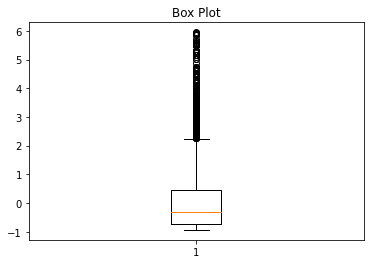

In [264]:
plt.boxplot(df['MonthlyPremiumAuto'])
plt.title("Box Plot")
plt.show()

In [268]:
obj = RobustScaler()

df['MonthlyPremiumAuto'] = obj.fit_transform(df[['MonthlyPremiumAuto']])

In [269]:
df

,Unnamed: 0,Customer,State,CustomerLifetimeValue,Coverage,Education,EffectiveToDate,EmploymentStatus,Income,MonthlyPremiumAuto,...,PolicyType_Personal Auto,PolicyType_Special Auto,SalesChannel_Agent,SalesChannel_Branch,SalesChannel_Call Center,SalesChannel_Web,Response_No,Response_Yes,Gender_F,Gender_M
0,0,0.065696,4,0.121269,0.0,2.0,0.0,0.0,0.562847,-0.341463,...,0,0,1,0,0,0,1,0,1,0
1,1,0.651046,0,0.579478,1.0,2.0,1.0,1.0,0.000000,0.268293,...,1,0,1,0,0,0,1,0,1,0
2,2,0.010511,2,0.858209,2.0,2.0,2.0,0.0,0.487763,0.609756,...,1,0,1,0,0,0,1,0,1,0
3,3,0.877696,1,0.639303,0.0,2.0,3.0,1.0,0.000000,0.560976,...,0,0,0,0,1,0,1,0,0,1
4,4,0.272419,4,0.131592,0.0,2.0,4.0,0.0,0.438443,-0.243902,...,1,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,9129,0.422315,1,0.957836,0.0,2.0,44.0,0.0,0.719547,-0.243902,...,1,0,0,0,0,1,1,0,0,1
9130,9130,0.590168,1,0.172886,1.0,1.0,21.0,0.0,0.216081,-0.097561,...,0,0,0,1,0,0,0,1,1,0
9131,9131,0.732289,1,0.686070,1.0,2.0,11.0,1.0,0.000000,0.048780,...,0,0,0,1,0,0,1,0,0,1
9132,9132,0.789883,1,0.626990,1.0,1.0,4.0,0.0,0.219452,0.317073,...,1,0,0,1,0,0,1,0,0,1


## 2. Feature Selection
### 2.1 Correlation matrix

In [270]:
corr = df.corr()

In [272]:
corr

,Unnamed: 0,Customer,State,CustomerLifetimeValue,Coverage,Education,EffectiveToDate,EmploymentStatus,Income,MonthlyPremiumAuto,...,PolicyType_Personal Auto,PolicyType_Special Auto,SalesChannel_Agent,SalesChannel_Branch,SalesChannel_Call Center,SalesChannel_Web,Response_No,Response_Yes,Gender_F,Gender_M
Unnamed: 0,1.000000,-0.016995,-0.071456,0.001960,-0.002759,-0.005382,0.007794,0.009924,-0.013246,-0.002135,...,-0.012693,-0.040886,0.001179,0.003367,0.001850,-0.007997,0.010549,-0.010549,-0.009050,0.009050
Customer,-0.016995,1.000000,0.011494,-0.016144,-0.005677,-0.005979,0.005121,0.004392,-0.008700,0.002520,...,-0.003002,-0.019031,0.007849,0.002738,-0.012893,0.000139,-0.023256,0.023256,-0.018435,0.018435
State,-0.071456,0.011494,1.000000,-0.003146,0.002047,-0.003758,0.001507,-0.005381,0.004620,0.007898,...,0.004108,0.005816,0.005076,0.001507,-0.013816,0.006567,0.002473,-0.002473,0.004933,-0.004933
CustomerLifetimeValue,0.001960,-0.016144,-0.003146,1.000000,0.234917,-0.022838,-0.000853,-0.049650,0.053626,0.434193,...,-0.002627,0.021728,0.008619,0.004234,0.004240,-0.022042,0.006767,-0.006767,0.007381,-0.007381
Coverage,-0.002759,-0.005677,0.002047,0.234917,1.000000,-0.018081,-0.001117,-0.013213,-0.010646,0.458997,...,-0.000176,0.001949,0.015774,0.010118,-0.014502,-0.018405,-0.000642,0.000642,0.014448,-0.014448
Education,-0.005382,-0.005979,-0.003758,-0.022838,-0.018081,1.000000,-0.005881,-0.038801,0.067275,-0.020807,...,0.017525,-0.009164,-0.009745,0.002649,0.012844,-0.004345,-0.022809,0.022809,0.010496,-0.010496
EffectiveToDate,0.007794,0.005121,0.001507,-0.000853,-0.001117,-0.005881,1.000000,-0.017682,0.003255,0.022633,...,0.001477,-0.011755,-0.026947,0.017614,0.022619,-0.010689,0.043187,-0.043187,-0.004755,0.004755
EmploymentStatus,0.009924,0.004392,-0.005381,-0.049650,-0.013213,-0.038801,-0.017682,1.000000,-0.523033,-0.008087,...,0.011143,0.000221,0.027975,-0.011981,-0.030524,0.010945,-0.188797,0.188797,-0.002231,0.002231
Income,-0.013246,-0.008700,0.004620,0.053626,-0.010646,0.067275,0.003255,-0.523033,1.000000,-0.016665,...,-0.006332,0.009430,-0.012321,-0.001518,0.012366,0.005062,-0.011932,0.011932,0.015138,-0.015138
MonthlyPremiumAuto,-0.002135,0.002520,0.007898,0.434193,0.458997,-0.020807,0.022633,-0.008087,-0.016665,1.000000,...,0.000571,-0.001851,0.010476,0.001593,-0.010485,-0.004722,-0.010966,0.010966,-0.003918,0.003918


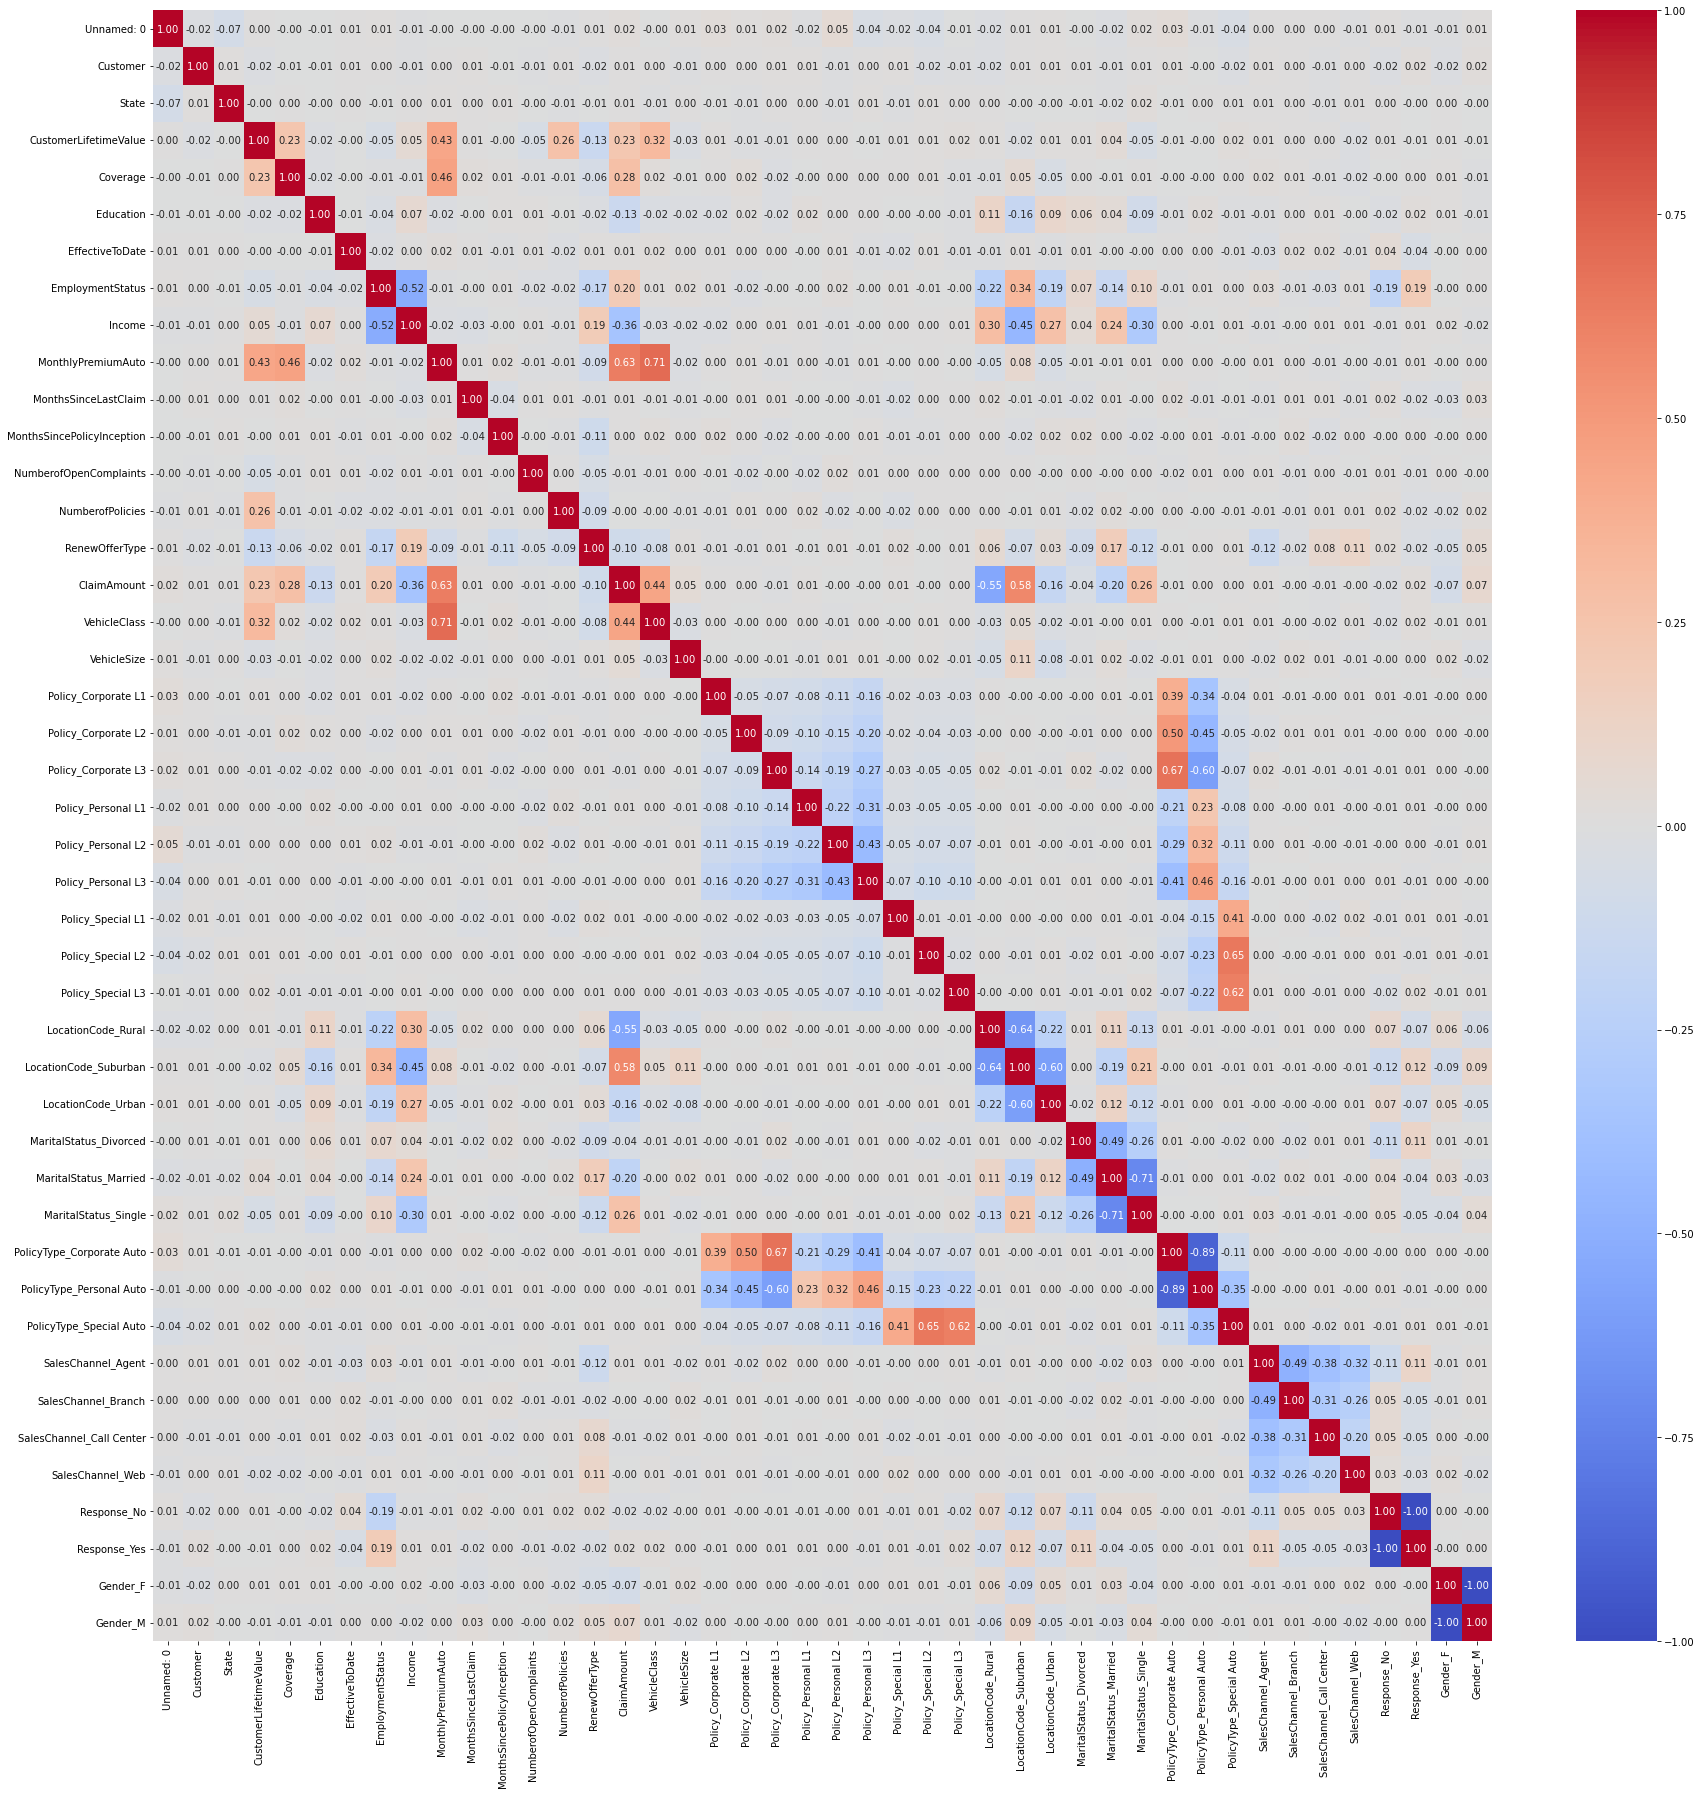

In [275]:
plt.figure(figsize = (30,30))
sns.heatmap(corr, annot = True, cmap = 'coolwarm', fmt = '.2f')
plt.show()

In [276]:
high_corr = corr.unstack()
high_corr

Unnamed: 0  Unnamed: 0               1.000000
            Customer                -0.016995
            State                   -0.071456
            CustomerLifetimeValue    0.001960
            Coverage                -0.002759
                                       ...   
Gender_M    SalesChannel_Web        -0.023196
            Response_No             -0.004396
            Response_Yes             0.004396
            Gender_F                -1.000000
            Gender_M                 1.000000
Length: 1936, dtype: float64

In [277]:
high_corr = corr.unstack().reset_index()
high_corr

,level_0,level_1,0
0,Unnamed: 0,Unnamed: 0,1.000000
1,Unnamed: 0,Customer,-0.016995
2,Unnamed: 0,State,-0.071456
3,Unnamed: 0,CustomerLifetimeValue,0.001960
4,Unnamed: 0,Coverage,-0.002759
...,...,...,...
1931,Gender_M,SalesChannel_Web,-0.023196
1932,Gender_M,Response_No,-0.004396
1933,Gender_M,Response_Yes,0.004396
1934,Gender_M,Gender_F,-1.000000


In [278]:
high_corr.columns = ['Feature1', 'Feature2', 'Correlation']
high_corr

,Feature1,Feature2,Correlation
0,Unnamed: 0,Unnamed: 0,1.000000
1,Unnamed: 0,Customer,-0.016995
2,Unnamed: 0,State,-0.071456
3,Unnamed: 0,CustomerLifetimeValue,0.001960
4,Unnamed: 0,Coverage,-0.002759
...,...,...,...
1931,Gender_M,SalesChannel_Web,-0.023196
1932,Gender_M,Response_No,-0.004396
1933,Gender_M,Response_Yes,0.004396
1934,Gender_M,Gender_F,-1.000000


In [279]:
high_corr = high_corr[(high_corr['Correlation'] > 0.3) & (high_corr['Correlation'] != 1)]

high_corr

,Feature1,Feature2,Correlation
141,CustomerLifetimeValue,MonthlyPremiumAuto,0.434193
148,CustomerLifetimeValue,VehicleClass,0.320295
185,Coverage,MonthlyPremiumAuto,0.458997
336,EmploymentStatus,LocationCode_Suburban,0.335258
399,MonthlyPremiumAuto,CustomerLifetimeValue,0.434193
400,MonthlyPremiumAuto,Coverage,0.458997
411,MonthlyPremiumAuto,ClaimAmount,0.632017
412,MonthlyPremiumAuto,VehicleClass,0.710633
669,ClaimAmount,MonthlyPremiumAuto,0.632017
676,ClaimAmount,VehicleClass,0.443510


In [280]:
high_corr = high_corr.sort_values(by = 'Correlation', ascending = True)

high_corr

,Feature1,Feature2,Correlation
148,CustomerLifetimeValue,VehicleClass,0.320295
707,VehicleClass,CustomerLifetimeValue,0.320295
1518,PolicyType_Personal Auto,Policy_Personal L2,0.323404
1002,Policy_Personal L2,PolicyType_Personal Auto,0.323404
336,EmploymentStatus,LocationCode_Suburban,0.335258
1239,LocationCode_Suburban,EmploymentStatus,0.335258
825,Policy_Corporate L1,PolicyType_Corporate Auto,0.385966
1470,PolicyType_Corporate Auto,Policy_Corporate L1,0.385966
1091,Policy_Special L1,PolicyType_Special Auto,0.410604
1564,PolicyType_Special Auto,Policy_Special L1,0.410604


### 2.2 Chi-Square Test

In [281]:
contingency_matrix = pd.crosstab(df['CustomerLifetimeValue'], df['MonthlyPremiumAuto'])

contingency_matrix

MonthlyPremiumAuto,-0.536585,-0.512195,-0.487805,-0.463415,-0.439024,-0.414634,-0.390244,-0.365854,-0.341463,-0.317073,...,4.878049,4.902439,4.926829,4.951220,4.975610,5.048780,5.170732,5.195122,5.219512,5.243902
CustomerLifetimeValue,,,,,,,,,,,,,,,,,,,,,
0.000000,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.000124,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
0.000249,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.000373,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.000498,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.999502,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.999627,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.999751,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [282]:
_ , p_value, _ ,_ = chi2_contingency(contingency_matrix)

In [283]:
p_value

0.0

## 3. Feature Balancing

### 3.1 OverSampling
### 3.1.1 SMOTE

In [294]:
obj_smote = SMOTE(sampling_strategy = .5)

x_smote, y_smote = obj_smote.fit_resample(x,y)

In [295]:
y_smote.value_counts()

Response_No
1              7826
0              3913
dtype: int64

### 3.1.2 Random Sampling

In [284]:
df

,Unnamed: 0,Customer,State,CustomerLifetimeValue,Coverage,Education,EffectiveToDate,EmploymentStatus,Income,MonthlyPremiumAuto,...,PolicyType_Personal Auto,PolicyType_Special Auto,SalesChannel_Agent,SalesChannel_Branch,SalesChannel_Call Center,SalesChannel_Web,Response_No,Response_Yes,Gender_F,Gender_M
0,0,0.065696,4,0.121269,0.0,2.0,0.0,0.0,0.562847,-0.341463,...,0,0,1,0,0,0,1,0,1,0
1,1,0.651046,0,0.579478,1.0,2.0,1.0,1.0,0.000000,0.268293,...,1,0,1,0,0,0,1,0,1,0
2,2,0.010511,2,0.858209,2.0,2.0,2.0,0.0,0.487763,0.609756,...,1,0,1,0,0,0,1,0,1,0
3,3,0.877696,1,0.639303,0.0,2.0,3.0,1.0,0.000000,0.560976,...,0,0,0,0,1,0,1,0,0,1
4,4,0.272419,4,0.131592,0.0,2.0,4.0,0.0,0.438443,-0.243902,...,1,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,9129,0.422315,1,0.957836,0.0,2.0,44.0,0.0,0.719547,-0.243902,...,1,0,0,0,0,1,1,0,0,1
9130,9130,0.590168,1,0.172886,1.0,1.0,21.0,0.0,0.216081,-0.097561,...,0,0,0,1,0,0,0,1,1,0
9131,9131,0.732289,1,0.686070,1.0,2.0,11.0,1.0,0.000000,0.048780,...,0,0,0,1,0,0,1,0,0,1
9132,9132,0.789883,1,0.626990,1.0,1.0,4.0,0.0,0.219452,0.317073,...,1,0,0,1,0,0,1,0,0,1


<AxesSubplot:ylabel='Response_No'>

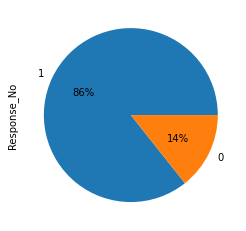

In [285]:
df.Response_No.value_counts().plot(kind = 'pie', autopct = '%0.0f%%')

In [286]:
!pip install imbalanced-learn

In [287]:
from imblearn.over_sampling import RandomOverSampler, SMOTE

In [289]:
x = df.drop('Response_No', axis = 1)  

In [290]:
y = df.loc[: , ['Response_No']] 

In [291]:
obj_ros = RandomOverSampler(sampling_strategy = 'not majority')

x_ros, y_ros = obj_ros.fit_resample(x,y)

In [292]:
y.value_counts()

Response_No
1              7826
0              1308
dtype: int64

In [293]:
y_ros.value_counts()

Response_No
0              7826
1              7826
dtype: int64

## 3.2 UnderSampling

### 3.2.1 Random Under Sampler

In [296]:
from imblearn.under_sampling import RandomUnderSampler

obj_rus = RandomUnderSampler(sampling_strategy = 'not minority')
x_rus, y_rus = obj_rus.fit_resample(x,y)

In [297]:
y_rus.value_counts()

Response_No
0              1308
1              1308
dtype: int64

### 3.2.2 EditedNearestNeighbours

In [298]:
from imblearn.under_sampling import EditedNearestNeighbours

In [299]:
obj_enn = EditedNearestNeighbours(n_neighbors = 5)
x_enn, y_enn = obj_enn.fit_resample(x,y)

In [300]:
y_enn.value_counts()

Response_No
1              3731
0              1308
dtype: int64